# Machine Learning
Machine learning (of machinaal leren; ML) is een specifieke benadering binnen de artificiële intelligentie (AI). De focus ligt op wiskundige algorithmes om complexe patronen in **data** te **leren** herkennen en/of te reproduceren. De bedoeling is om software systemen te creeren die **voorspellingen** kunnen maken en/of **acties** kunnen ondernemen **zonder expliciete instructies te programmeren**.  
  
:::{note} 🌍
:icon: false
:class: simple 
Stel, we hebben een airco installatie die we willen automatiseren. De bedoeling is dat ze zichzelf inschakelt wanneer de binnentemperatuur boven een critische waarde $\beta$ uitkomt. De vraag stelt zich dan: wat is de beste waarde voor $\beta$?  
  
We kunnen dit *zonder ingebouwde machine learning* oplossen door een vaste temperatuur te hard-coden in het productieprocess. Dit heeft als voordeel dat er geen user-interface nodig is, maar er zullen flink wat gebruikers ontevreden zijn omwille van persoonlijke temperatuursensaties.
We kunnen, nog steeds *zonder ingebouwde machine learning*, tegemoet komen aan persoonlijke voorkeuren door gebruikers via een UI op ieder moment de mogelijkheid te geven temperatuur kiezen.  
  
Met machine learning kunnen we, *nadat gebruikers op voldoende momenten een voorkeur hebben ingegeven*, uit de ingegeven voorkeuren trachten te voorspellen wat het best moment is om de waarde van $\beta$ *autonoom* aan te passen en wat de beste waarden dan is. Als we daarin slagen, zal het gebruiksgemak uiteraard nog groter zijn.  
  
De bedoeling is om dus patronen in de voorkeuren wat betreft $\beta$ te ontdekken en die patronen te gebruiken om de waarde van $\beta$ op het volgende (discrete) tijdsstip te bepalen.
:::

Er zijn twee belangrijke stappen in machine learning:
1. Model training
2. Model inference

Om die goed te begrijpen, moeten we eerst het concept van een **machine learning model** toelichten.


:::{tip} ML & AI
:class: simple
Er bestaat veel verwarring over het begrip van ML en AI. Zoals reeds vermeld, is ML is een specifieke benadering binnen AI.
AI verwijst meer algemeen naar een eigenschap van een systeem (ongeacht of dat nu om een software applicatie of fysieke machine gaat).
Je kan een systeem op verschillende manier intelligent maken, ook zonder machine learning.  
Voorbeeld: {cite}`10.1145/365153.365168`
:::

:::{tip} Simulatie
:class: simple
Om de principes van Machine Learning goed te leren vatten is het vaak nuttig om simulaties te doen.
Zo kunnen we zelf geïdealiseerde datasets maken, met patronen die we zelf maken. We hebben dus een perfecte beschrijving van _de manier waarop de data tot stand kwamen_.  
  
Hieronder simuleren we een dataset met $\beta$ waarden voor het airco voorbeeld. We bouwen het volgende patroon in:

- **Winter/Lente**: Hogere gemiddelde $\beta$-waarden (mensen willen het warmer binnen als het koud is buiten)
- **Zomer/Herfst**: Lagere gemiddelde $\beta$-waarden (mensen tolereren koelere temperaturen binnen als het warm is buiten)
- **Zomer**: Hogere variabiliteit (meer onenigheid over comfort door wisselende buitencondities)
- **Winter**: Lagere variabiliteit (meer consensus over gewenste binnenwarmte)
:::

In [15]:
from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [16]:
# Set random seed for reproducibility using Generator
rng = np.random.default_rng(42)

# Create 2-year daily time series
start_date = datetime(2022, 1, 1)
end_date = datetime(2023, 12, 31)
dates = pd.date_range(start=start_date, end=end_date, freq="D")
n_days = len(dates)

# Create day of year for seasonal calculations (0-365)
day_of_year = np.array([d.timetuple().tm_yday for d in dates])

# Seasonal parameters
winter_mean = 23.0  # Higher β in winter (warmer indoor preference)
summer_mean = 21.0  # Lower β in summer
winter_std = 1.2  # Lower variability in winter
summer_std = 2.0  # Higher variability in summer

# Create seasonal mean using sinusoidal function
# Peak in winter (day ~15 = mid January), minimum in summer (day ~195 = mid July)
seasonal_mean = summer_mean + (winter_mean - summer_mean) * 0.5 * (
    1 + np.cos(2 * np.pi * (day_of_year - 15) / 365)
)

# Create seasonal standard deviation
# Minimum std in winter, maximum in summer
seasonal_std = winter_std + (summer_std - winter_std) * 0.5 * (
    1 - np.cos(2 * np.pi * (day_of_year - 15) / 365)
)

# Generate β values from Gaussian distributions with seasonal parameters
beta_values = rng.normal(seasonal_mean, seasonal_std)

# Create DataFrame for easier handling
df = pd.DataFrame(
    {
        "date": dates,
        "beta": beta_values,
        "seasonal_mean": seasonal_mean,
        "seasonal_std": seasonal_std,
        "month": [d.month for d in dates],
    }
)

print(f"Simulatie van β-waarden over {len(dates)} dagen (2 jaar)")
print(f"Gemiddelde β: {np.mean(beta_values):.2f}°C")
print(f"Standaarddeviatie β: {np.std(beta_values):.2f}°C")
print(f"Minimum β: {np.min(beta_values):.2f}°C")
print(f"Maximum β: {np.max(beta_values):.2f}°C")

Simulatie van β-waarden over 730 dagen (2 jaar)
Gemiddelde β: 21.92°C
Standaarddeviatie β: 1.77°C
Minimum β: 16.06°C
Maximum β: 26.75°C


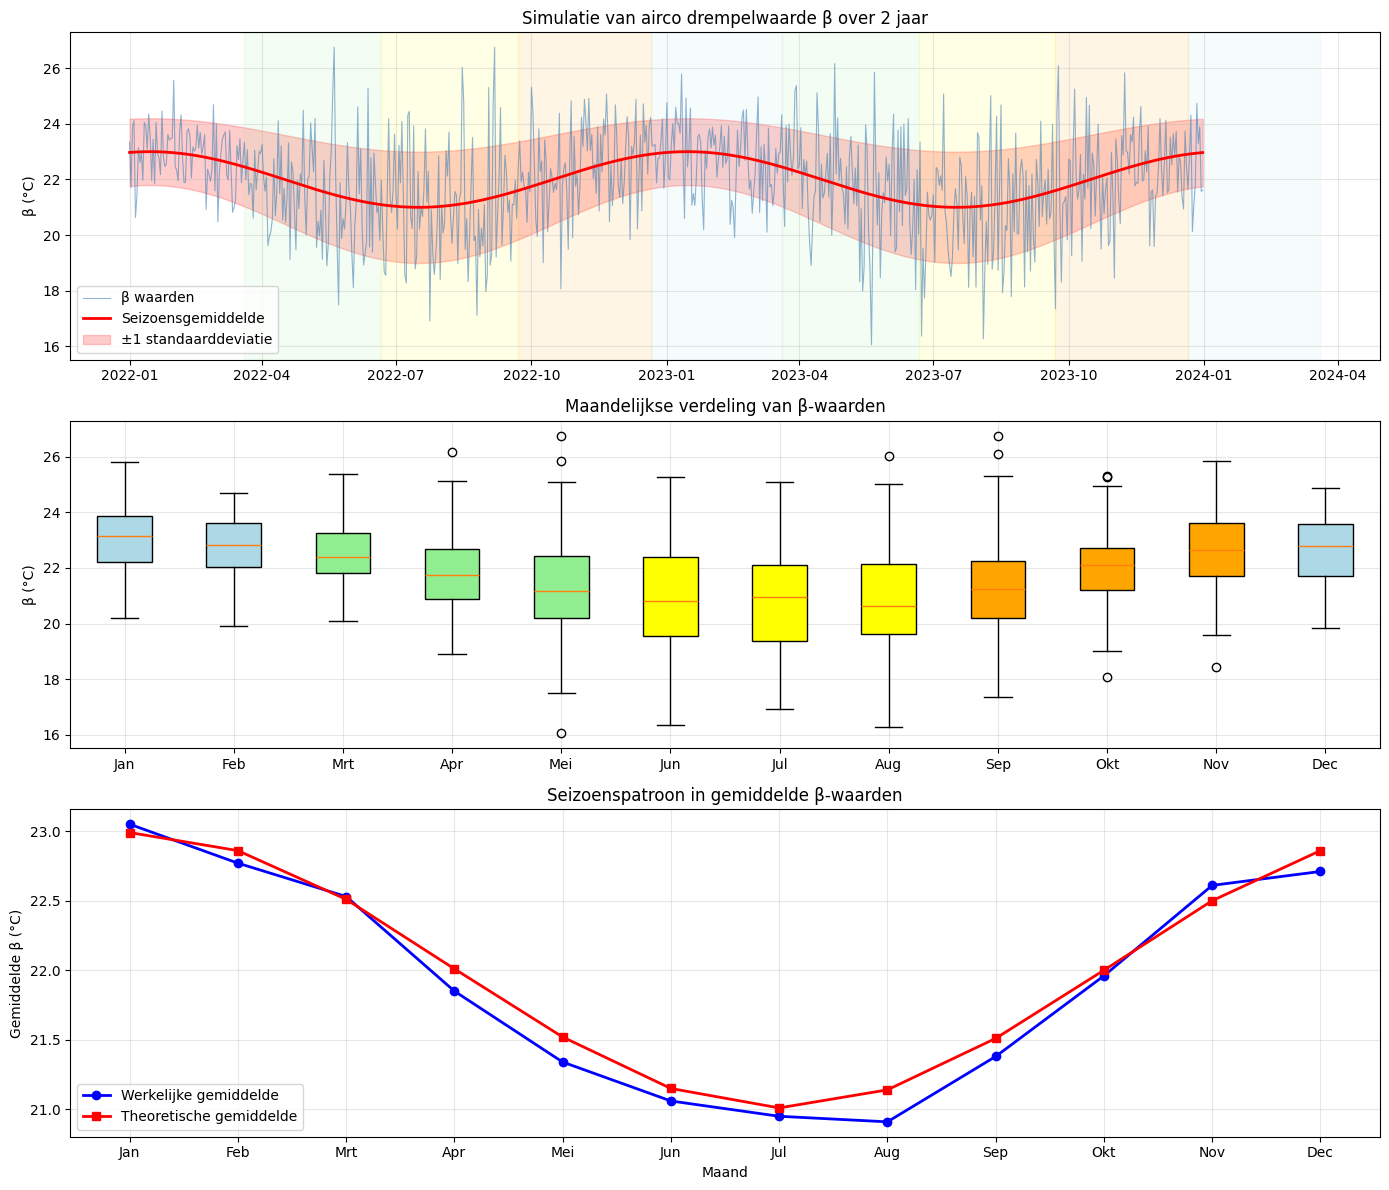


Seizoensstatistieken:
Winter: Gemiddelde = 22.85°C, Std = 1.16°C
Lente: Gemiddelde = 21.91°C, Std = 1.65°C
Zomer: Gemiddelde = 20.97°C, Std = 1.92°C
Herfst: Gemiddelde = 21.98°C, Std = 1.76°C


In [14]:
# Create comprehensive visualization
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 12))

# Plot 1: β values over time with seasonal mean
ax1.plot(df["date"], df["beta"], alpha=0.6, color="steelblue", linewidth=0.8, label="β waarden")
ax1.plot(df["date"], df["seasonal_mean"], color="red", linewidth=2, label="Seizoensgemiddelde")
ax1.fill_between(
    df["date"],
    df["seasonal_mean"] - df["seasonal_std"],
    df["seasonal_mean"] + df["seasonal_std"],
    alpha=0.2,
    color="red",
    label="±1 standaarddeviatie",
)
ax1.set_ylabel("β (°C)")
ax1.set_title("Simulatie van airco drempelwaarde β over 2 jaar")
ax1.legend()
ax1.grid(True, alpha=0.3)

# Add season labels
season_colors = {
    "Winter": "lightblue",
    "Lente": "lightgreen",
    "Zomer": "yellow",
    "Herfst": "orange",
}
for year in [2022, 2023]:
    ax1.axvspan(
        datetime(year, 12, 21), datetime(year + 1, 3, 20), alpha=0.1, color=season_colors["Winter"]
    )
    ax1.axvspan(
        datetime(year, 3, 20), datetime(year, 6, 21), alpha=0.1, color=season_colors["Lente"]
    )
    ax1.axvspan(
        datetime(year, 6, 21), datetime(year, 9, 22), alpha=0.1, color=season_colors["Zomer"]
    )
    ax1.axvspan(
        datetime(year, 9, 22), datetime(year, 12, 21), alpha=0.1, color=season_colors["Herfst"]
    )

# Plot 2: Monthly boxplot
monthly_data = [df[df["month"] == month]["beta"].values for month in range(1, 13)]
box_plot = ax2.boxplot(
    monthly_data,
    tick_labels=[
        "Jan",
        "Feb",
        "Mrt",
        "Apr",
        "Mei",
        "Jun",
        "Jul",
        "Aug",
        "Sep",
        "Okt",
        "Nov",
        "Dec",
    ],
    patch_artist=True,
)
ax2.set_ylabel("β (°C)")
ax2.set_title("Maandelijkse verdeling van β-waarden")
ax2.grid(True, alpha=0.3)

# Color boxes by season
season_months = {
    "Winter": [0, 1, 11],  # Jan, Feb, Dec (0-indexed)
    "Lente": [2, 3, 4],  # Mar, Apr, May
    "Zomer": [5, 6, 7],  # Jun, Jul, Aug
    "Herfst": [8, 9, 10],  # Sep, Oct, Nov
}

for season, months in season_months.items():
    for month_idx in months:
        box_plot["boxes"][month_idx].set_facecolor(season_colors[season])

# Plot 3: Seasonal statistics
seasonal_stats = (
    df.groupby(df["date"].dt.month)
    .agg({"beta": ["mean", "std"], "seasonal_mean": "mean", "seasonal_std": "mean"})
    .round(2)
)

months = range(1, 13)
ax3.plot(
    months,
    seasonal_stats[("beta", "mean")],
    "o-",
    color="blue",
    label="Werkelijke gemiddelde",
    linewidth=2,
)
ax3.plot(
    months,
    seasonal_stats[("seasonal_mean", "mean")],
    "s-",
    color="red",
    label="Theoretische gemiddelde",
    linewidth=2,
)
ax3.set_ylabel("Gemiddelde β (°C)")
ax3.set_xlabel("Maand")
ax3.set_title("Seizoenspatroon in gemiddelde β-waarden")
ax3.set_xticks(months)
ax3.set_xticklabels(
    ["Jan", "Feb", "Mrt", "Apr", "Mei", "Jun", "Jul", "Aug", "Sep", "Okt", "Nov", "Dec"]
)
ax3.legend()
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print seasonal summary
print("\nSeizoensstatistieken:")
season_mapping = {
    "Winter": [12, 1, 2],
    "Lente": [3, 4, 5],
    "Zomer": [6, 7, 8],
    "Herfst": [9, 10, 11],
}

for season, months in season_mapping.items():
    season_data = df[df["month"].isin(months)]["beta"]
    print(f"{season}: Gemiddelde = {season_data.mean():.2f}°C, Std = {season_data.std():.2f}°C")